### Dataset Hospital readmissions. The objective: based on ML make prediction on the readmissions

#### "age" - age of the patient
#### "time_in_hospital" - days (from 1 to 14)
#### "n_procedures" - number of procedures  performed during the hospital stay
#### "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
#### "n_medications" - number of medications administered during the hospital stay
#### "n_outpatient" - number of outpatient visits in the year before a hospital stay
#### "n_inpatient" - number of inpatient visits in the year before the hospital stay
#### "n_emergency" - number of visits to the emergency room in the year before the hospital stay
#### "medical_specialty" - the specialty of the admitting physician
#### "diag_1" - primary diagnosis (Circulatory, Respiratory, etc.)
#### "diag_2" - secondary diagnosis
#### "diag_3" - additional diagnosis
#### "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
#### "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
#### "change" - whether there ws a change in the diabetes medication ('yes' or 'no')
#### "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
#### "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

### Import dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('hospital_readmissions.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

### Check medical_specialty - Missing Information is around 50%

In [30]:
df['medical_specialty'].value_counts(normalize=True)

medical_specialty
Missing                   0.49528
InternalMedicine          0.14260
Other                     0.10656
Emergency/Trauma          0.07540
Family/GeneralPractice    0.07528
Cardiology                0.05636
Surgery                   0.04852
Name: proportion, dtype: float64

### Based on the most frequent 1st diagnosis complete Missing information for the medical_specialty

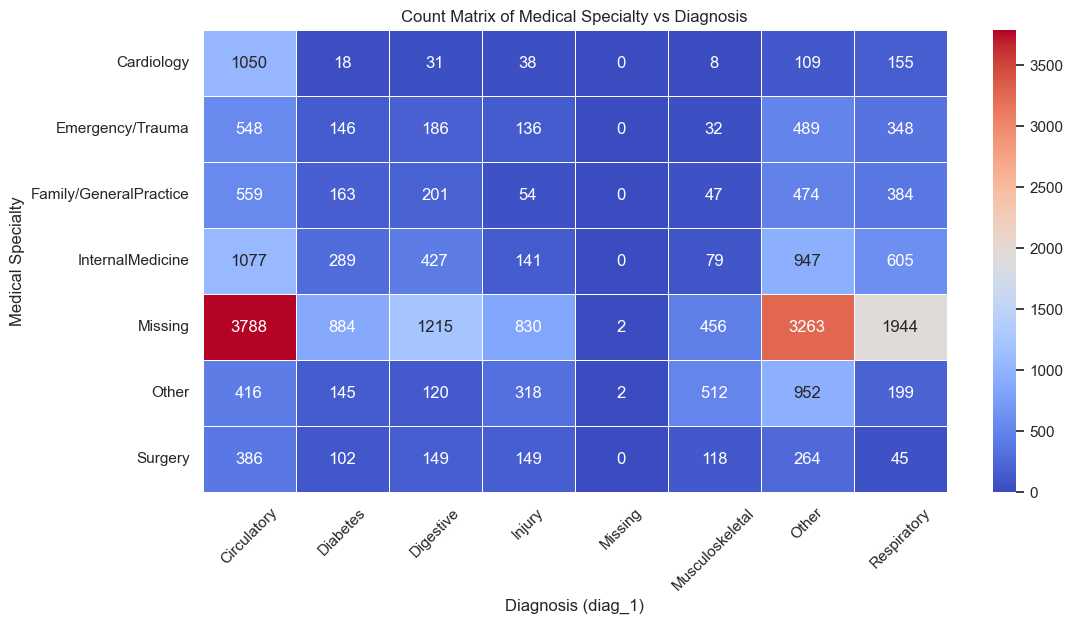

In [31]:
pivot_table = pd.crosstab(df['medical_specialty'], df['diag_1'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

plt.xlabel("Diagnosis (diag_1)")
plt.ylabel("Medical Specialty")
plt.title("Count Matrix of Medical Specialty vs Diagnosis")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()


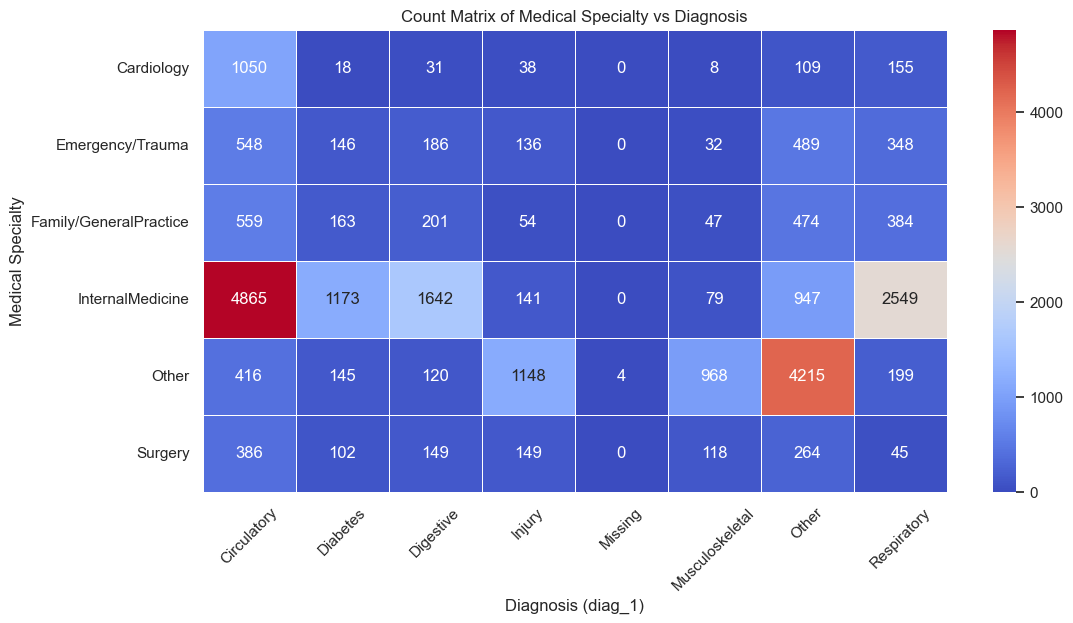

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [32]:
df['medical_specialty'] = df['medical_specialty'].fillna("Missing")
most_common_specialty = df[df['medical_specialty'] != "Missing"].groupby('diag_1')['medical_specialty'].agg(lambda x: x.value_counts().idxmax())
df.loc[df['medical_specialty'] == "Missing", 'medical_specialty'] = df['diag_1'].map(most_common_specialty)
df['medical_specialty'] = df['medical_specialty'].fillna("Other")


pivot_table = pd.crosstab(df['medical_specialty'], df['diag_1'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.xlabel("Diagnosis (diag_1)")
plt.ylabel("Medical Specialty")
plt.title("Count Matrix of Medical Specialty vs Diagnosis")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()
df.info()

### Check diag_1 - Other Information is around 26%

In [33]:
df['diag_1'].value_counts(normalize=True)

diag_1
Circulatory        0.31296
Other              0.25992
Respiratory        0.14720
Digestive          0.09316
Diabetes           0.06988
Injury             0.06664
Musculoskeletal    0.05008
Missing            0.00016
Name: proportion, dtype: float64

### The solution is to replace "Other" with Secondary or Tertiary diagnoses. After this operation it left only 6%

diag_1
Circulatory        0.39128
Respiratory        0.17760
Diabetes           0.12628
Digestive          0.10988
Injury             0.07576
Other              0.06272
Musculoskeletal    0.05600
Missing            0.00048
Name: proportion, dtype: float64


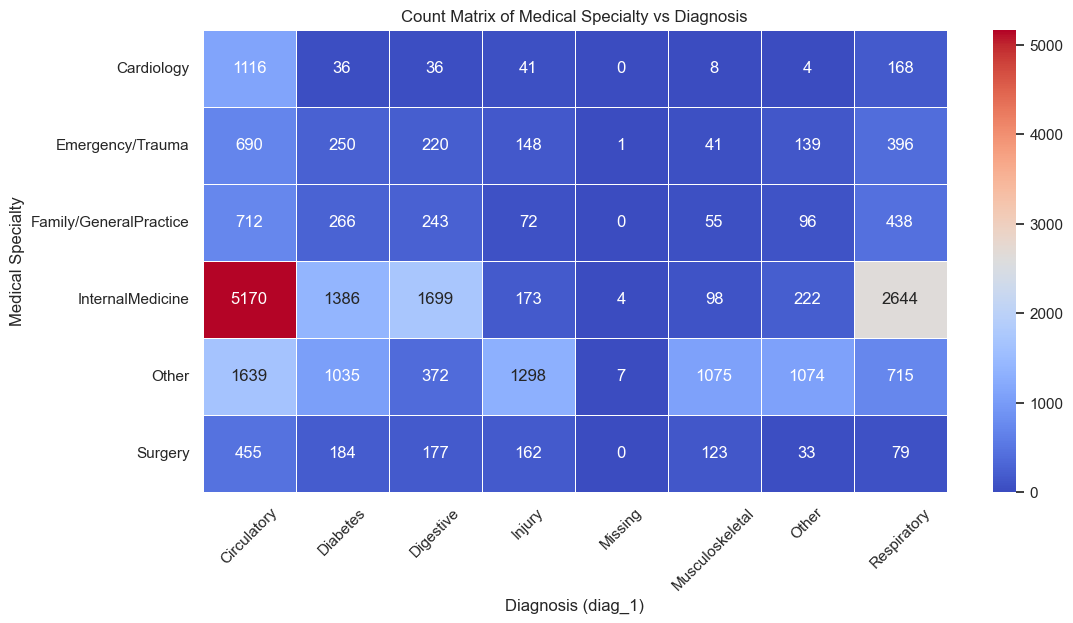

In [34]:
df['diag_1'] = np.where(df['diag_1'] == 'Other', np.where(df['diag_2'] == 'Other', df['diag_3'], df['diag_2']), df['diag_1'])
print(df['diag_1'].value_counts(normalize=True))


pivot_table = pd.crosstab(df['medical_specialty'], df['diag_1'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.xlabel("Diagnosis (diag_1)")
plt.ylabel("Medical Specialty")
plt.title("Count Matrix of Medical Specialty vs Diagnosis")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()

### Considering that First diag is important for dataset analysis i decided to drop 6% of records (around 1580) what is just 6%

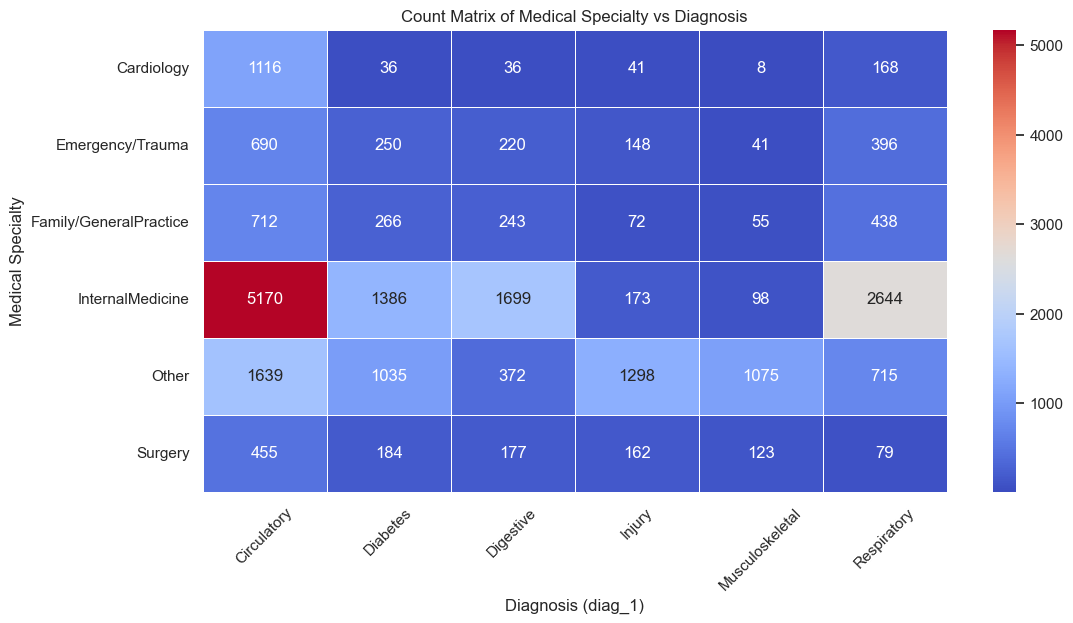

<class 'pandas.core.frame.DataFrame'>
Index: 23420 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                23420 non-null  object
 1   time_in_hospital   23420 non-null  int64 
 2   n_lab_procedures   23420 non-null  int64 
 3   n_procedures       23420 non-null  int64 
 4   n_medications      23420 non-null  int64 
 5   n_outpatient       23420 non-null  int64 
 6   n_inpatient        23420 non-null  int64 
 7   n_emergency        23420 non-null  int64 
 8   medical_specialty  23420 non-null  object
 9   diag_1             23420 non-null  object
 10  diag_2             23420 non-null  object
 11  diag_3             23420 non-null  object
 12  glucose_test       23420 non-null  object
 13  A1Ctest            23420 non-null  object
 14  change             23420 non-null  object
 15  diabetes_med       23420 non-null  object
 16  readmitted         23420 non-null  object
dty

In [35]:
df = df[~df[['diag_1']].isin(['Other']).any(axis=1)]
df = df[~df[['diag_1']].isin(['Missing']).any(axis=1)]

pivot_table = pd.crosstab(df['medical_specialty'], df['diag_1'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.xlabel("Diagnosis (diag_1)")
plt.ylabel("Medical Specialty")
plt.title("Count Matrix of Medical Specialty vs Diagnosis")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()
df.info()

### Convert some dual/triple categorical variable into numerical using 0 or 1 or 2

In [36]:
df1 = df.copy()
df1['readmitted'] = df1['readmitted'].map({'yes': 1, 'no': 0})
df1['readmitted'] = df1['readmitted'].astype(int)
df1['diabetes_med'] = df1['diabetes_med'].map({'yes': 1, 'no': 0})
df1['change'] = df1['change'].map({'yes': 1, 'no': 0})
df1['glucose_test_numeric'] = df1['glucose_test'].map({'no': 0, 'normal': 1, 'high': 2})
df1['A1C_test_numeric'] = df1['A1Ctest'].map({'no': 0, 'normal': 1, 'high': 2})

### Lets make one feature for the Diabetes indication because we have too many variable withy diabetes property like diag_1, diag_2, diag_3, glucose_test, A1Ctest, diabetes_med. So in total we will have 77% of patience with diabetes indication

In [37]:
# In case any of Diagnoses show up Diabetes and A1Ctest is High and glucose_test is High or Diabetes_med is 1 then its clear indication for the diabetes
df1['diabetes_flag'] = df1.apply(
    lambda row: 1 if ('Diabetes' in [row['diag_1'], row['diag_2'], row['diag_3']] and row['A1Ctest'] in ['High']) 
                    or ('Diabetes' in [row['diag_1'], row['diag_2'], row['diag_3']] and row['glucose_test'] in ['High']) 
                    or row['diabetes_med'] == 1 
                else 0,
    axis=1
)
ratio = df1['diabetes_flag'].value_counts(normalize=True) * 100
print(ratio)

diabetes_flag
1    76.981213
0    23.018787
Name: proportion, dtype: float64


### Lets verify does Diabetes Indication impacts readmissions. There is slight dependency

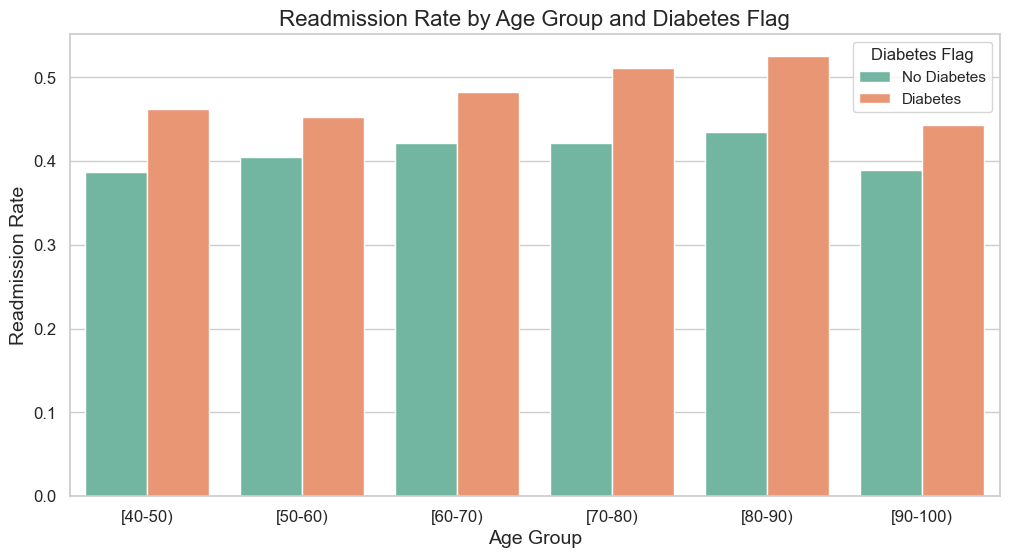

In [38]:
readmission_rate_by_age = df1.groupby(['age', 'diabetes_flag'])['readmitted'].mean().reset_index()
readmission_rate_by_age.columns = ['age', 'diabetes_flag', 'readmission_rate']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='age', y='readmission_rate', hue='diabetes_flag', data=readmission_rate_by_age, palette='Set2')

plt.title('Readmission Rate by Age Group and Diabetes Flag', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Readmission Rate', fontsize=14)

handles, labels = barplot.get_legend_handles_labels()
new_labels = ['No Diabetes', 'Diabetes']  
barplot.legend(handles, new_labels, title='Diabetes Flag', loc='upper right')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Based on Medical_specialty and Diag columns make Clustering using K-Means to understand High Risk groups for 

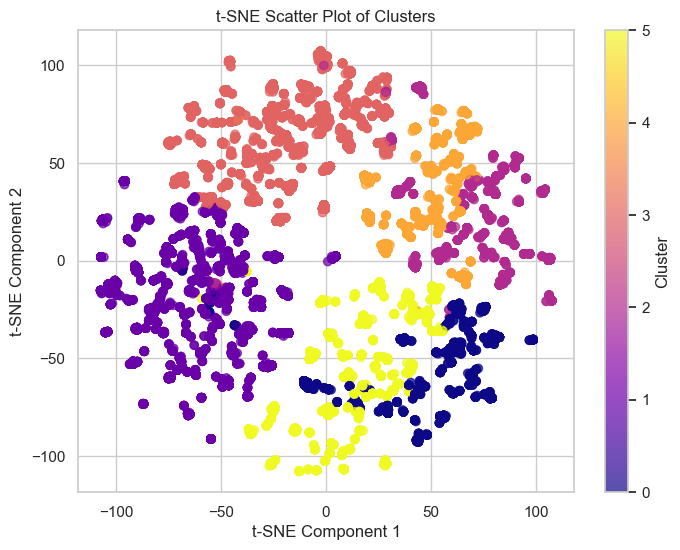

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

encoder = LabelEncoder()
df1['medical_specialty_encoded'] = encoder.fit_transform(df1['medical_specialty'])
df1['diag_1_encoded'] = encoder.fit_transform(df1['diag_1'])
df1['diag_2_encoded'] = encoder.fit_transform(df1['diag_2'])
df1['diag_3_encoded'] = encoder.fit_transform(df1['diag_3'])

features = ['medical_specialty_encoded', 'diag_1_encoded','diag_2_encoded','diag_3_encoded']
kmeans = KMeans(n_clusters=6, random_state=42)
df1['cluster'] = kmeans.fit_predict(df1[features])

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df1[features])

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df1['cluster'], cmap='plasma', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Scatter Plot of Clusters")
plt.colorbar(label="Cluster")
plt.show()


### Based on clusters we received lets see the impact on readmission. Oh, the impact is similar by all clusters and around 50%, it means all diagnoses and medical_specialty are important for prediction 

In [40]:
df1.groupby('cluster')['readmitted'].mean()



cluster
0    0.462072
1    0.466181
2    0.462582
3    0.468704
4    0.495025
5    0.486070
Name: readmitted, dtype: float64

### Impower 2 variables n_inpatient and n_emergency into one as "hospital_admissions" to have more stronger correlation for ML

In [41]:
df1['hospital_admissions'] = df1['n_inpatient'] + df1['n_emergency']

### Impower 2 variables n_procedures and n_lab_procedures into one as "hospital_procedures" to have more stronger correlation for ML

In [42]:
df1['hospital_procedures'] = df1['n_procedures'] + df1['n_lab_procedures']


### Check Outliers for numerical data

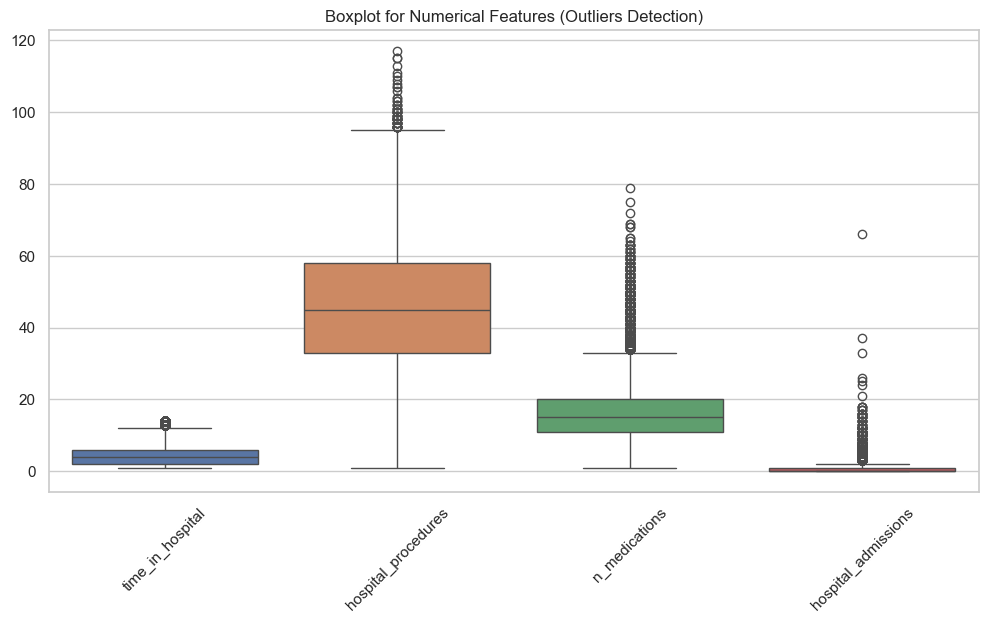

In [43]:
num_cols = ['time_in_hospital', 'hospital_procedures', 'n_medications',
            'hospital_admissions']

Q1 = df1[num_cols].quantile(0.25)
Q3 = df1[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df1[num_cols] < (Q1 - 1.5 * IQR)) | (df1[num_cols] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df1[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Features (Outliers Detection)")
plt.show()

#### So there are no super far end values and if we will delete outliers we are going to lose 3500 records. lets keep them

### Convert Ages to the midpoint as we have continuous ages

In [44]:
age_map = {
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)':95
}
df1['age_numeric'] = df1['age'].map(age_map)


### Make Correlation matrix based on unprocessed numerical data

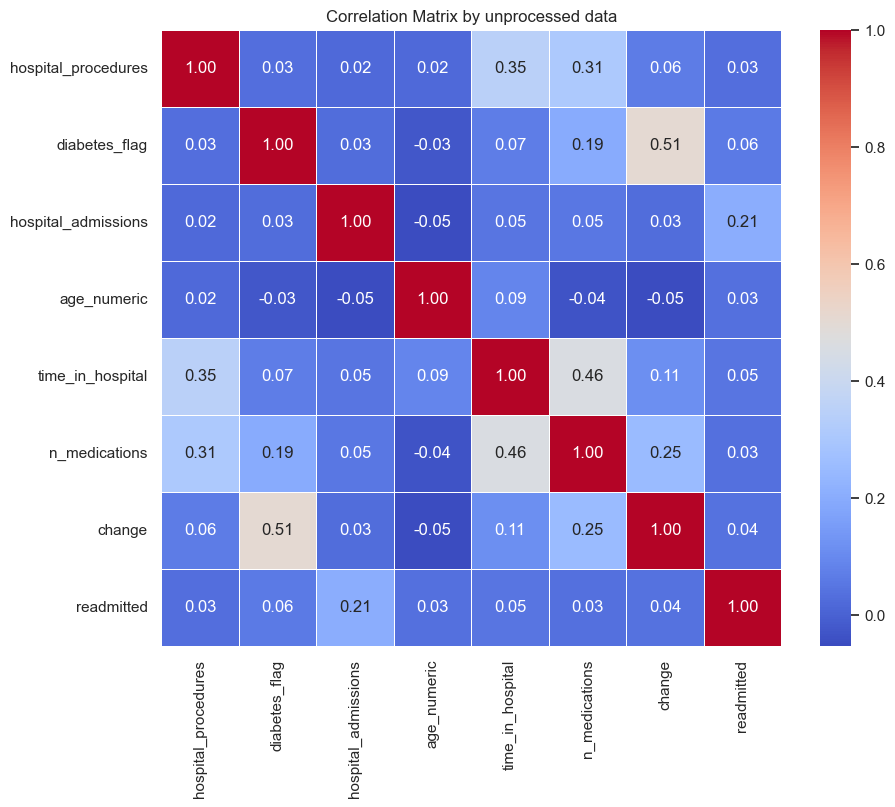

In [45]:
df1_num = df1[['hospital_procedures','diabetes_flag','hospital_admissions','age_numeric','time_in_hospital','n_medications','change','readmitted']]
correlation_matrix = df1_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix by unprocessed data')
plt.show()


### We do not see much correlation wih readmissions, so probably we need to preprocess numeric variables

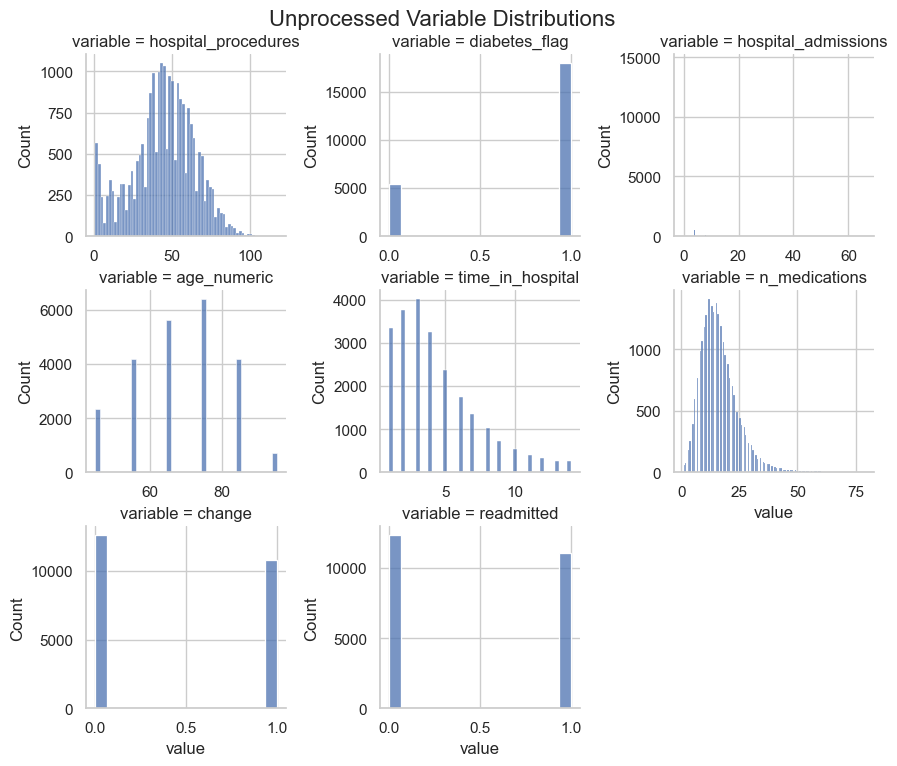

In [46]:
df1_num_unprocessed = sns.FacetGrid(df1_num.melt(),col='variable',sharey=False,sharex=False,col_wrap = 3)
df1_num_unprocessed.map(sns.histplot, "value")
df1_num_unprocessed.fig.subplots_adjust(top=0.8)
df1_num_unprocessed.fig.suptitle("Unprocessed Variable Distributions", fontsize=16,y=.85)
plt.show()

### The visible skewness observed in: hospital_admissions, time_in_hospital,n_lab_procedures,n_procedures,n_medications

In [47]:
transformCols = ['time_in_hospital','hospital_procedures','n_medications','hospital_admissions']
all([pd.api.types.is_numeric_dtype(df1_num[col]) for col in transformCols])

True

In [48]:
# Perform a log transformation of the data to unskew the data
df1_log = df1_num.copy()
for feat in transformCols:
    #Add one to avoid INF values
    df1_log[feat] = np.log(1+df1_num[feat])
    
#Change INF values to mean for each feature
for i in transformCols:
    df1_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    df1_log[i] = df1_log[i].fillna(df1_log[i].mean())


C:\Users\Aleksei Mironov\AppData\Local\Temp\ipykernel_11976\331241109.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)


In [49]:
# Perform Principal Component Analysis (PCA) to reduce dimensionality of the variables
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
df1_normalized = pipeline.fit_transform(df1_log)
df1_normalized.shape

(23420, 8)

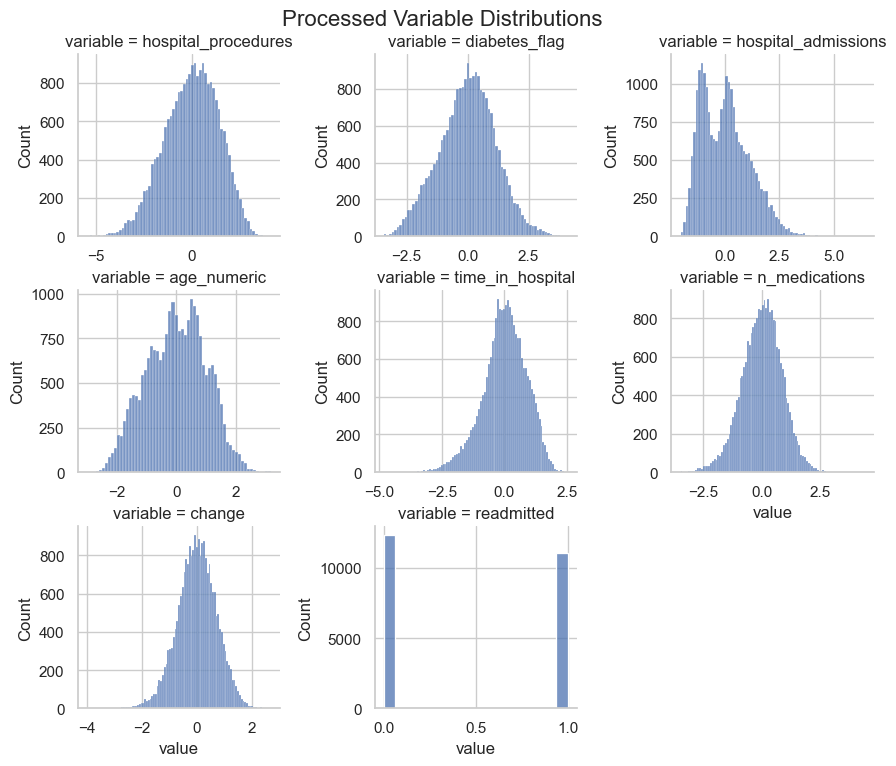

In [50]:
# Now lets scale the data for further analysis

df1_num_processed = pd.DataFrame(data=df1_normalized, index=df1_log.index, columns=df1_log.columns)
df1_num_processed['readmitted'] = df1_num['readmitted']

distribution_new = sns.FacetGrid(df1_num_processed.melt(),col="variable",col_wrap = 3,sharey=False,sharex=False)
distribution_new.map(sns.histplot, "value")
distribution_new.fig.subplots_adjust(top=0.8)
distribution_new.fig.suptitle("Processed Variable Distributions", fontsize=16,y=.85)
plt.show()

### Make New correlation matrix based on processed numerical data

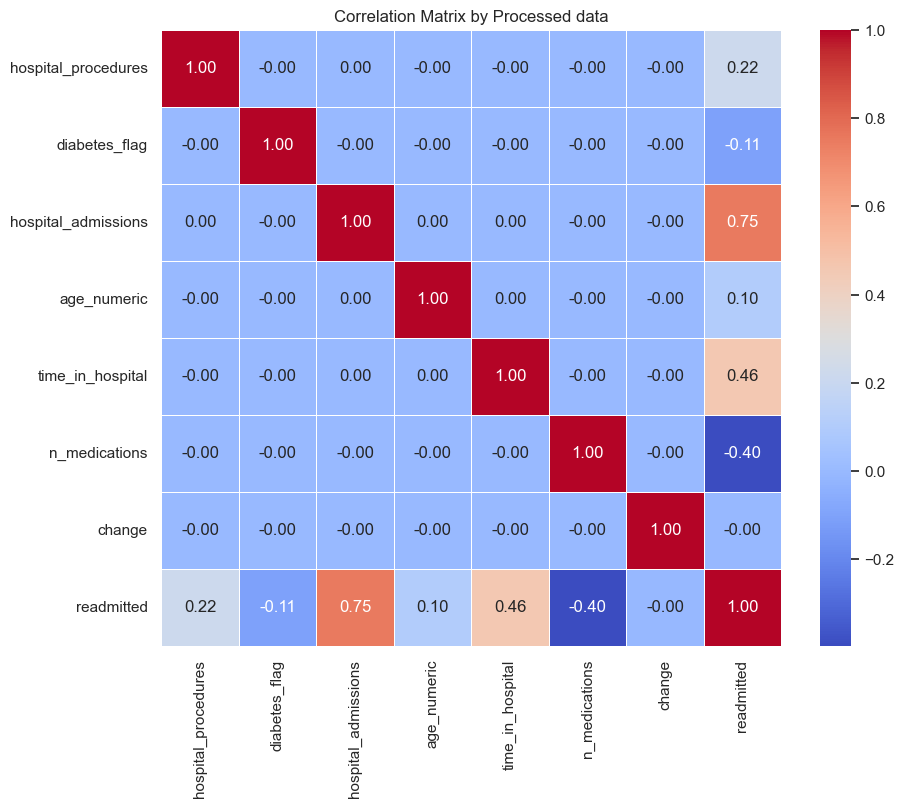

In [51]:
correlation_matrix = df1_num_processed.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix by Processed data')
plt.show()

#### Fantastic! Now we can clearly see the key numerical variables impacts readmissions: hospital_admissions, time_in_hospital. Another variables use or not its matter of whom we sell this analysis - to CEO (who may need easy and short explanation) or Procurement Chief who makes hospital budget prediction and interested in the accuracy for a well planning

### Make hot encoded diagnoses and medical_specialty for ML models

In [52]:
# lets make Diagnoses column as combination of all 3 diagnoses
df1['diagnoses'] = df1[['diag_1','diag_2','diag_3']].apply(lambda x: '|'.join(set(x.dropna())), axis=1)
df2 = pd.get_dummies(df1[['diagnoses']], columns=['diagnoses'], drop_first=True)
df2[['readmitted','hospital_admissions','n_medications','time_in_hospital']] = df1[['readmitted','hospital_admissions','n_medications','time_in_hospital']]


### Train the models

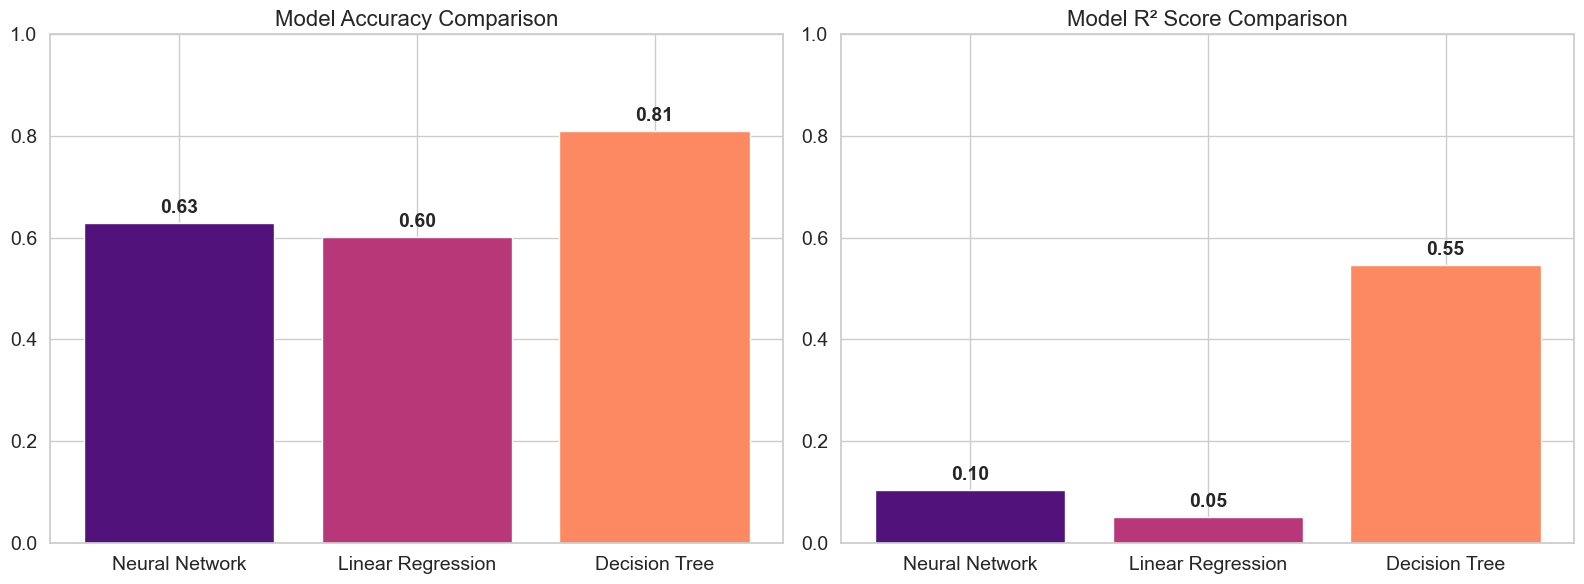

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor

from scipy import stats
import numpy as np
from sklearn.metrics import accuracy_score

X = df2.drop(columns=['readmitted'])
y = df2['readmitted']

models = {
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=10000, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor()
}
results = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)

    y_pred_binary = np.round(y_pred)

    r2 = r2_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred_binary)
    cm = confusion_matrix(y, y_pred_binary)
    
    results[name] = {
        "y_actual": y,
        "y_pred_binary": y_pred_binary,
        "accuracy": accuracy_score(y, y_pred_binary),
        "r2_score": r2
    }

model_names = list(results.keys())
accuracies = [results[name]["accuracy"] for name in model_names]
r2_scores = [results[name]['r2_score'] for name in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(model_names, accuracies, color=sns.color_palette("magma", len(model_names)))
ax1.set_title('Model Accuracy Comparison', fontsize=16)
ax1.tick_params(axis='both', labelsize=14) 
ax1.set_ylim(0, 1)  
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=14, fontweight='bold')

ax2.bar(model_names, r2_scores, color=sns.color_palette("magma", len(model_names)))
ax2.set_title('Model R² Score Comparison', fontsize=16)
ax2.tick_params(axis='both', labelsize=14) 
ax2.set_ylim(0, 1)  
for i, v in enumerate(r2_scores):
    ax2.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=14, fontweight='bold')   

plt.tight_layout()
plt.show()

### Conclusion: Accuracy and R-square is definitely better by Decision Tree Regression. Lets build for it a confusion matrix. We can see that model works well and accuracy is 82%

Text(0.5, 20.049999999999997, 'Predicted')

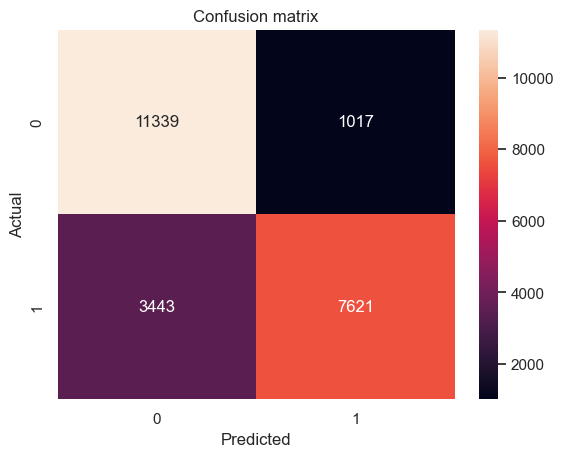

In [54]:
model = DecisionTreeRegressor()
model.fit(X, y)
y_pred = model.predict(X)
y_pred_binary = np.round(y_pred)

cnf_matrix = confusion_matrix(y, y_pred_binary)
sns.heatmap(cnf_matrix, annot=True, fmt="g")

plt.title("Confusion matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")